In [18]:
library(dplyr)
library(tidyr)
library(tibble)
library(ggplot2)
library(stringr)
library(ggrepel)
library(ggpubr)
library(scales)
library(RColorBrewer)

Warning message:
“package ‘scales’ was built under R version 4.3.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.3.3”


In [2]:


keep_celltypes <- c('Adaptive NK cell', 
                    'KLRF1- GZMB+ CD27- memory CD4 T cell',
                    'KLRF1- GZMB+ CD27- EM CD8 T cell',
                    'KLRF1+ GZMB+ CD27- EM CD8 T cell', 
                    'KLRF1- effector Vd1 gdT', 
                    'KLRF1+ effector Vd1 gdT')
     

# Read DEG Result

In [3]:
df_CMV<- read.csv('/home//workspace/IHA_Figure_Revision/Figure1/02_DEG/Deseq2_Result_Y1D0.csv')
df_CMV <- df_CMV %>% filter(celltype %in% keep_celltypes) 
df_CMV_counts <- df_CMV %>%
  filter(contrast == 'CMV') %>%
  mutate(Expression = case_when(
    log2FoldChange >= 0.1 & padj <= 0.05 ~ "Differentially Expressed",
    log2FoldChange <= -0.1 & padj <= 0.05 ~ "Differentially Expressed",
    TRUE ~ "Unchanged"
  )) %>%
  group_by(celltype) %>%
  summarise(total_count = sum(Expression == "Differentially Expressed"), .groups = 'drop') %>%
  as.data.frame()
     

In [4]:
df_CMV_counts$deg_type <- 'CMV+ vs CMV-'


In [5]:
df_Age_CMV_pos<-read.csv("05_DEG_CMV_Pos_Only/Deseq2_Result_Y1D0_CMV_Pos.csv")

In [6]:
df_Age_CMV_pos <- df_Age_CMV_pos %>% filter(celltype %in% keep_celltypes) 


In [7]:
df_Age_CMV_pos_counts <- df_Age_CMV_pos %>%
  filter(contrast == 'cohort.cohortGuid') %>%
  mutate(Expression = case_when(
    log2FoldChange >= 0.1 & padj <= 0.05 ~ "Differentially Expressed",
    log2FoldChange <= -0.1 & padj <= 0.05 ~ "Differentially Expressed",
    TRUE ~ "Unchanged"
  )) %>%
  group_by(celltype) %>%
  summarise(total_count = sum(Expression == "Differentially Expressed"), .groups = 'drop') %>%
  as.data.frame()

In [8]:
df_Age_CMV_pos_counts$deg_type <- 'Young-Old CMV+'


In [9]:
df_Age_CMV_pos_counts

celltype,total_count,deg_type
<chr>,<int>,<chr>
Adaptive NK cell,2,Young-Old CMV+
KLRF1+ GZMB+ CD27- EM CD8 T cell,1,Young-Old CMV+
KLRF1+ effector Vd1 gdT,0,Young-Old CMV+
KLRF1- GZMB+ CD27- EM CD8 T cell,3,Young-Old CMV+
KLRF1- GZMB+ CD27- memory CD4 T cell,0,Young-Old CMV+
KLRF1- effector Vd1 gdT,0,Young-Old CMV+


In [10]:
df_CMV_counts

celltype,total_count,deg_type
<chr>,<int>,<chr>
Adaptive NK cell,63,CMV+ vs CMV-
KLRF1+ GZMB+ CD27- EM CD8 T cell,23,CMV+ vs CMV-
KLRF1+ effector Vd1 gdT,7,CMV+ vs CMV-
KLRF1- GZMB+ CD27- EM CD8 T cell,56,CMV+ vs CMV-
KLRF1- GZMB+ CD27- memory CD4 T cell,8,CMV+ vs CMV-
KLRF1- effector Vd1 gdT,3,CMV+ vs CMV-


In [15]:
df_combined <- rbind(df_Age_CMV_pos_counts,df_CMV_counts)
df_combined$celltype<-factor(df_combined$celltype,levels=rev(keep_celltypes))

# Plotting

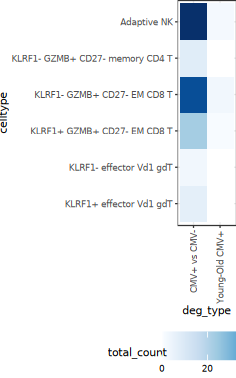

In [25]:

options(repr.plot.width = 50/25.4, repr.plot.height = 80/25.4)
max_deg_number<-max(df_combined$total_count)
p <- df_combined %>% ggplot(aes(y=celltype,x=deg_type, fill = total_count))+
    geom_tile()+
  theme_bw(base_size = 6) +
  theme(legend.position = "bottom") + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) +
  theme(plot.margin = grid::unit(c(0, 0, 0, -0.25), "mm")) +
  scale_y_discrete(labels = function(x) gsub(" cell", "", x)) +
scale_fill_gradientn(
    colours = c("white", brewer.pal(9, "Blues")[0:9]),
    values = rescale(c(0, seq(1, max_deg_number, length.out = 9))),
    limits = c(0, max_deg_number)
  )
p
ggsave('FigureG.pdf',p,width = 50/25.4,height =  80/25.4)